# Betabank Customer Churn Prediction

This notebook presents a complete workflow for predicting customer churn for Betabank. The process includes data loading, exploratory data analysis, preprocessing, model training, evaluation, and final conclusions. Each step is explained in detail, and code cells are commented for clarity.

This project will analyze the effects of downsampling and oversampling techniques. 
First we will prepare our data without class balance adjustments to train candidate models. Aditionally, we will train the same candidates but this time we will balance the classes

# Account Closure Predictor for BetaBank Users

Beta Bank customers are leaving, little by little, every month. Bankers have discovered that it is cheaper to retain existing customers than to attract new ones.

We need to predict if a customer will leave the bank soon. You have data on past customer behavior and contract terminations with the bank.

We will Create a model with the highest possible F1 score. To pass the review, we set an F1 score of at least 0.59.

For this particullar project we will compare the AUC-ROC and F1-score metrics to correctly assess our candidates.

Data Description

Features

- RowNumber: data string index
- CustomerId: unique customer identifier
- Surname: last name
- CreditScore: credit score
- Geography: country of residence
- Gender: gender
- Age: age
- Tenure: period during which the client's fixed-term deposit has matured (years)
- Balance: account balance
- NumOfProducts: number of bank products used by the client
- HasCrCard: the client has a credit card (1 - yes; 0 - no)
- IsActiveMember: client activity (1 - yes; 0 - no)
- EstimatedSalary: estimated salary
- Target:
    - Exited: The client has left (1 - yes; 0 - no)

Project Evaluation
We have defined the evaluation criteria for the project. Read this carefully before proceeding to the exercise.


## Dependencies

The following libraries are used for data manipulation, machine learning, and evaluation metrics throughout this notebook.

In [42]:
# Import necessary libraries for data analysis and machine learning
import pandas as pd  # For data manipulation and analysis

import numpy as np  # For numerical operations

import matplotlib.pyplot as plt  # For plotting graphs


from sklearn.ensemble import RandomForestClassifier  # Random Forest model
from sklearn.metrics import confusion_matrix, f1_score, recall_score, precision_score, roc_auc_score, roc_curve  # Evaluation metrics
from sklearn.linear_model import LogisticRegression  # Logistic Regression model
from sklearn.model_selection import train_test_split  # For splitting data into train and test sets
from sklearn.preprocessing import StandardScaler, OneHotEncoder  # For feature scaling and encoding categorical variables

from sklearn.utils import shuffle  # For shuffling data



### Data Loading and Exploration

In this section, we will load the dataset and perform an initial exploration to understand its structure and contents.

## Loading dataset

In [43]:
# Load the dataset and display the first few rows to understand its structure

data = pd.read_csv('data/Churn.csv')  # Load the data from CSV file

data.head()  # Display the first five rows of the dataset

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2.0,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1.0,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8.0,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1.0,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2.0,125510.82,1,1,1,79084.10,0


In [44]:
data.info() # Display information about the dataset, including data types and non-null counts

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           9091 non-null   float64
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(3), int64(8), object(3)
memory usage: 1.1+ MB


In [45]:
data.describe() # Display summary statistics of the dataset

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,9091.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,4.997690,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.894723,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,2.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [46]:
data.duplicated().sum() # Check for duplicate rows in the dataset

np.int64(0)

The `Surname` is not relevant for our perdictor, and in adittion if we try to use one hot enconder over the `Surname` column it will generate a huge amount of new columns. For that reason the columns we will include as features are:

In [47]:
data = data.drop('RowNumber', axis=1)  # Drop the 'RowNumber' column as it is not neede
data = data.drop('Surname', axis=1)  # Drop the 'Surname' column as it is not needed for analysi
data = data.drop('CustomerId', axis=1)  # Drop the 'CustomerId' column as it is not needed for analysisdata = data.dropna() # Drop rows with missing values
data = data.dropna()  # Drop rows with missing values
data.info() # Check the dataset information again after dropping missing values

<class 'pandas.core.frame.DataFrame'>
Index: 9091 entries, 0 to 9998
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      9091 non-null   int64  
 1   Geography        9091 non-null   object 
 2   Gender           9091 non-null   object 
 3   Age              9091 non-null   int64  
 4   Tenure           9091 non-null   float64
 5   Balance          9091 non-null   float64
 6   NumOfProducts    9091 non-null   int64  
 7   HasCrCard        9091 non-null   int64  
 8   IsActiveMember   9091 non-null   int64  
 9   EstimatedSalary  9091 non-null   float64
 10  Exited           9091 non-null   int64  
dtypes: float64(3), int64(6), object(2)
memory usage: 852.3+ KB


### Data Preparation

Here, we will prepare the features and target variable, and split the data into training and validation sets for model development.

In [48]:
X = data.drop('Exited', axis=1)
y = data['Exited']

In [49]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)  # Split the data into training and testing sets

### Encoding

There are some categorical variable we need to encode, those are `Geography` (Nominal), `Gender`(nominal)

In [50]:
categorical_columns = ['Geography', 'Gender']

encoder = OneHotEncoder(drop='first', handle_unknown='ignore', sparse_output=False)  # Initialize OneHotEncoder with options to handle unknown categories and output as dense arra
encoder.fit(X_train[categorical_columns])

X_train_enc = encoder.transform(X_train[categorical_columns])
X_test_enc = encoder.transform(X_test[categorical_columns])

### Scaling 

In [51]:
numeric_columns = ['CreditScore','Age', 'Tenure', 'Balance', 'NumOfProducts','EstimatedSalary']
scaler = StandardScaler()
scaler.fit(X_train[numeric_columns])

X_train_scaled = scaler.transform(X_train[numeric_columns])
X_test_scaled = scaler.transform(X_test[numeric_columns])


In [52]:
X_train_processed = np.hstack((X_train_scaled, X_train_enc))
X_test_processed = np.hstack((X_test_scaled, X_test_enc))

## Target

### Class disbalance

<Axes: xlabel='Exited'>

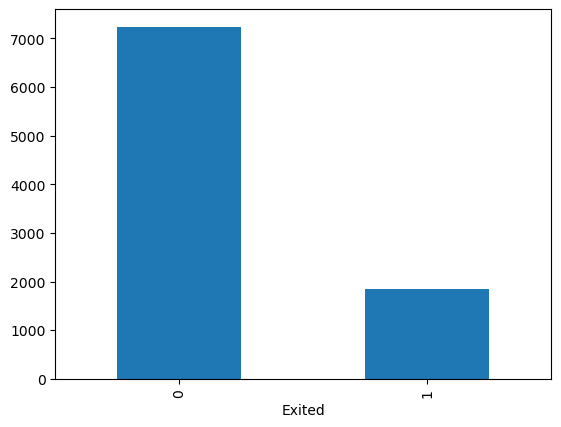

In [53]:
y.value_counts().plot(kind='bar')

Let's make predictions with the imbalance

## Predictive models

### Model Training and Evaluation

In this section, we will train machine learning models to predict customer churn, evaluate their performance using F1 and AUC-ROC metrics, later on we will do the same process but including balanced classes.

#### Random Forest classification

In [54]:
random_forest_results = pd.DataFrame(columns=['depth', 'confusion_matrix', 'f1_score', 'training_score', 'validation_score', 'recall_score', 'precision_score'])
random_forest_results.set_index('depth', inplace=True)
n=1
for depth in range(1, 16):
    model = RandomForestClassifier(random_state=12345, max_depth=depth, n_estimators=20,  class_weight='balanced')
    model.fit(X_train_processed, y_train)

    predicted_values = model.predict(X_test_processed)

    random_forest_results.loc[n, 'depth'] = depth 
    random_forest_results.loc[n, 'confusion_matrix'] = str(confusion_matrix(y_test, predicted_values)).replace('\n', '*')
    random_forest_results.loc[n, 'f1_score'] = f1_score(y_test, predicted_values)
    random_forest_results.loc[n, 'training_score'] = model.score(X_train_processed, y_train)
    random_forest_results.loc[n, 'validation_score'] = model.score(X_test_processed, y_test)
    random_forest_results.loc[n, 'recall_score'] = recall_score(predicted_values, y_test)
    
    random_forest_results.loc[n, 'roc_auc_score'] = roc_auc_score(y_test, model.predict_proba(X_test_processed)[:, 1])      
    random_forest_results.loc[n, 'precision_score'] = precision_score(predicted_values, y_test)

    n +=1 

random_forest_results

,confusion_matrix,f1_score,training_score,validation_score,recall_score,precision_score,depth,roc_auc_score
depth,,,,,,,,
1,[[1427 388]* [ 154 304]],0.528696,0.764007,0.761549,0.439306,0.663755,1.0,0.775972
2,[[1380 435]* [ 124 334]],0.544417,0.75858,0.75407,0.43433,0.729258,2.0,0.805240
3,[[1443 372]* [ 145 313]],0.547682,0.779994,0.772547,0.456934,0.683406,3.0,0.819862
4,[[1468 347]* [ 145 313]],0.559928,0.796861,0.783546,0.474242,0.683406,4.0,0.828813
5,[[1498 317]* [ 150 308]],0.56879,0.807275,0.794545,0.4928,0.672489,5.0,0.836709
6,[[1507 308]* [ 151 307]],0.572227,0.820622,0.798064,0.499187,0.670306,6.0,0.833732
7,[[1518 297]* [ 154 304]],0.574127,0.829862,0.801584,0.505824,0.663755,7.0,0.838639
8,[[1537 278]* [ 157 301]],0.580521,0.847169,0.808623,0.519862,0.657205,8.0,0.841941
9,[[1555 260]* [ 165 293]],0.579624,0.871957,0.813022,0.529837,0.639738,9.0,0.836696


<Axes: title={'center': 'ROC-AUC Score vs Depth of Random Forest'}, xlabel='depth'>

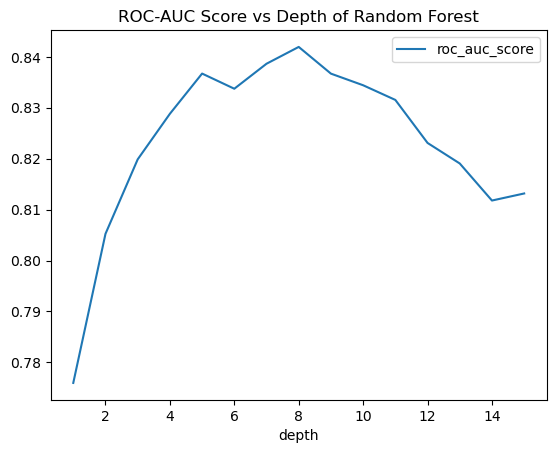

In [55]:
random_forest_results.plot(x='depth', y='roc_auc_score', kind='line', title='ROC-AUC Score vs Depth of Random Forest')

In [56]:
best_model_i = int(random_forest_results['roc_auc_score'].idxmax())
best_model = random_forest_results.loc[best_model_i]  
best_model

confusion_matrix    [[1537  278]* [ 157  301]]
f1_score                              0.580521
training_score                        0.847169
validation_score                      0.808623
recall_score                          0.519862
precision_score                       0.657205
depth                                      8.0
roc_auc_score                         0.841941
Name: 8, dtype: object

Text(0, 0.5, 'TPR')

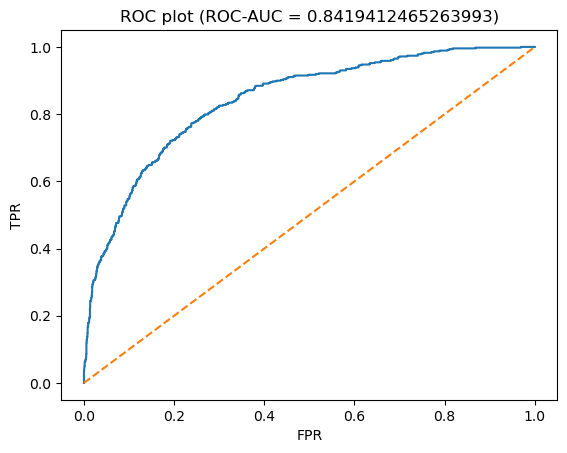

In [57]:
best_depth = int(best_model['depth'])
best_forest = RandomForestClassifier(random_state=12345, max_depth=best_depth, n_estimators=20, class_weight='balanced')

best_forest.fit(X_train_processed, y_train)
probabilities = best_forest.predict_proba(X_test_processed)[:, 1]

fpr, tpr, threshold= roc_curve(y_test, probabilities)
roc_auc = roc_auc_score(y_test, probabilities)

plt.figure()
plt.plot(fpr, tpr)
plt.plot([0,1],[0,1], linestyle='--')
plt.title(f'ROC plot (ROC-AUC = {roc_auc})')
plt.xlabel('FPR')
plt.ylabel('TPR')

#### Logistic regression

In [58]:
model = LogisticRegression(random_state=12345,  class_weight='balanced')
model.fit(X_train_processed, y_train)

y_probabilities = model.predict_proba(X_test_processed)[:,1]


logistic_regression_results = pd.DataFrame(columns=['threshold', 'recall_score', 'precision_score', 'f1_score', 'confusion_matrix', 'training_score', 'validation_score'])
n=0

for threshold in np.arange(0, 0.75, 0.01):
    predicted_values = y_probabilities > threshold

    logistic_regression_results.loc[n, 'threshold'] = threshold 
    logistic_regression_results.loc[n, 'confusion_matrix'] = str(confusion_matrix(y_test, predicted_values)).replace('\n', '*')
    logistic_regression_results.loc[n, 'f1_score'] = f1_score(y_test, predicted_values)
    logistic_regression_results.loc[n, 'training_score'] = model.score(X_train_processed, y_train)
    logistic_regression_results.loc[n, 'validation_score'] = model.score(X_test_processed, y_test)
    logistic_regression_results.loc[n, 'recall_score'] = recall_score(predicted_values, y_test)
    logistic_regression_results.loc[n, 'precision_score'] = precision_score(predicted_values, y_test)
    n += 1
    
logistic_regression_results



,threshold,recall_score,precision_score,f1_score,confusion_matrix,training_score,validation_score
0,0.0,0.201496,1.0,0.335408,[[ 0 1815]* [ 0 458]],0.714286,0.702156
1,0.01,0.201496,1.0,0.335408,[[ 0 1815]* [ 0 458]],0.714286,0.702156
2,0.02,0.201496,1.0,0.335408,[[ 0 1815]* [ 0 458]],0.714286,0.702156
3,0.03,0.201496,1.0,0.335408,[[ 0 1815]* [ 0 458]],0.714286,0.702156
4,0.04,0.201496,1.0,0.335408,[[ 0 1815]* [ 0 458]],0.714286,0.702156
...,...,...,...,...,...,...,...
70,0.7,0.445483,0.312227,0.367137,[[1637 178]* [ 315 143]],0.714286,0.702156
71,0.71,0.445183,0.292576,0.353096,[[1648 167]* [ 324 134]],0.714286,0.702156
72,0.72,0.459364,0.283843,0.350877,[[1662 153]* [ 328 130]],0.714286,0.702156
73,0.73,0.456604,0.264192,0.334716,[[1671 144]* [ 337 121]],0.714286,0.702156


Text(0.5, 1.0, 'ROC plot (ROC-AUC = 0.7401073056888857)')

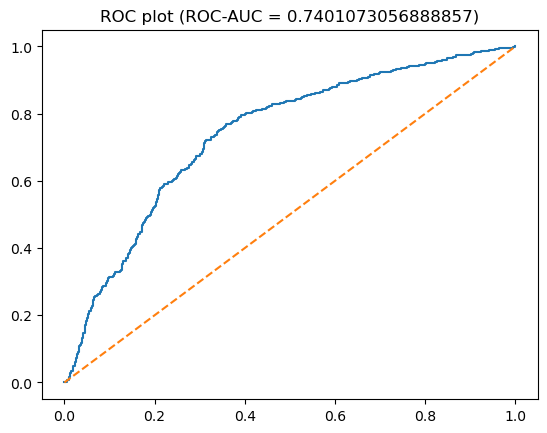

In [59]:
best_log_model_i = int(logistic_regression_results['f1_score'].idxmax())
best_log_model = logistic_regression_results.iloc[best_log_model_i]

best_log_threshold = best_log_model['threshold']

predicted_values = y_probabilities > best_log_threshold

fpr, tpr, threshold = roc_curve(y_test, y_probabilities)
roc_auc = roc_auc_score(y_test, y_probabilities)


plt.figure()
plt.plot(fpr, tpr)
plt.plot([0,1], [0,1], linestyle='--')
plt.title(f'ROC plot (ROC-AUC = {roc_auc})')

## Balancing

### Downsampling

In [60]:
def downsampling(features, target, fraction)->list|None:
    features_ones = features[target==1] 
    features_zeros = features[target==0] 
    target_zeros = target[target==0]
    target_ones = target[target==1]
    
    features_zeros_sample = features_zeros.sample(frac = fraction, random_state=12345)
    target_zeros_sample = target_zeros.sample(frac=fraction, random_state=12345)
    downsized_features = pd.concat([features_zeros_sample]+[features_ones])
    downsized_target = pd.concat([target_zeros_sample]+[target_ones])
    return shuffle(downsized_features, downsized_target, random_state=12345)
    

In [61]:
X_balanced, y_balanced = downsampling(X_train, y_train, 0.25)
print(y_balanced.value_counts())
print(X_balanced.shape)

Exited
1    1396
0    1356
Name: count, dtype: int64
(2752, 10)


In [62]:
X_train_down, y_train_down,  = X_balanced,  y_balanced

In [63]:
encoder = OneHotEncoder(drop='first', handle_unknown='ignore', sparse_output=False)  # Initialize OneHotEncoder with options to handle unknown categories and output as dense array
encoder.fit(X_train_down[categorical_columns])

X_train_enc_down = encoder.transform(X_train_down[categorical_columns])
X_test_enc_down = encoder.transform(X_test[categorical_columns])

In [64]:
scaler = StandardScaler()
scaler.fit(X_train_down[numeric_columns])
X_train_scaled_down = scaler.transform(X_train_down[numeric_columns])
X_test_scaled_down = scaler.transform(X_test[numeric_columns])

In [65]:
X_train_processed_down = np.hstack((X_train_enc_down, X_train_scaled_down))
X_test_processed_down = np.hstack((X_test_enc_down, X_test_scaled_down))

#### Models

##### Random Forest Classifier

In [ ]:
random_forest_results = pd.DataFrame(columns=['max_depth', 'confusion_matrix', 'f1_score', 'training_score', 'validation_score', 'recall_score', 'precision_score'])
n=1
best_roc_auc_score= 0
best_model = None

for depth in range(1, 16):
    model = RandomForestClassifier(random_state=12345, max_depth=depth, n_estimators=20)
    model.fit(X_train_processed_down, y_train_down)

    y_probabilities = model.predict_proba(X_test_processed_down)[:, 1]
    y_predicted_values = y_probabilities > 0.5

    roc_auc = roc_auc_score(y_test, y_probabilities)

    random_forest_results.loc[n, 'max_depth'] = depth 
    random_forest_results.loc[n, 'roc_auc_score'] = roc_auc    
    random_forest_results.loc[n, 'confusion_matrix'] = str(confusion_matrix(y_test, y_predicted_values)).replace('\n', '*')
    random_forest_results.loc[n, 'f1_score'] =  f1_score(y_test, y_predicted_values)
    random_forest_results.loc[n, 'training_score'] = model.score(X_train_processed_down, y_train_down)
    random_forest_results.loc[n, 'validation_score'] = model.score(X_test_processed_down, y_test)
    random_forest_results.loc[n, 'recall_score'] = recall_score(y_predicted_values, y_test)
    random_forest_results.loc[n, 'precision_score'] = precision_score(y_predicted_values, y_test)
    if  roc_auc > best_roc_auc_score:
        best_model = model
        best_roc_auc_score = roc_auc
    n += 1
random_forest_results

,max_depth,confusion_matrix,f1_score,training_score,validation_score,recall_score,precision_score,roc_auc_score
1,1,[[1351 464]* [ 153 305]],0.497148,0.707122,0.728553,0.396619,0.665939,0.770531
2,2,[[1366 449]* [ 148 310]],0.509449,0.724927,0.737352,0.408432,0.676856,0.792528
3,3,[[1360 455]* [ 126 332]],0.533333,0.756904,0.744391,0.421855,0.724891,0.815523
4,4,[[1460 355]* [ 140 318]],0.562334,0.765625,0.782226,0.472511,0.694323,0.822386
5,5,[[1439 376]* [ 133 325]],0.560828,0.789608,0.776067,0.463623,0.709607,0.834428
6,6,[[1432 383]* [ 130 328]],0.561163,0.801599,0.774307,0.461322,0.716157,0.831614
7,7,[[1445 370]* [ 135 323]],0.561251,0.817224,0.777827,0.466089,0.70524,0.838525
8,8,[[1443 372]* [ 131 327]],0.565255,0.845203,0.778707,0.467811,0.713974,0.837307
9,9,[[1436 379]* [ 126 332]],0.568007,0.874273,0.777827,0.466948,0.724891,0.835293
10,10,[[1430 385]* [ 126 332]],0.565106,0.90298,0.775187,0.46304,0.724891,0.832829


###### ROC curve

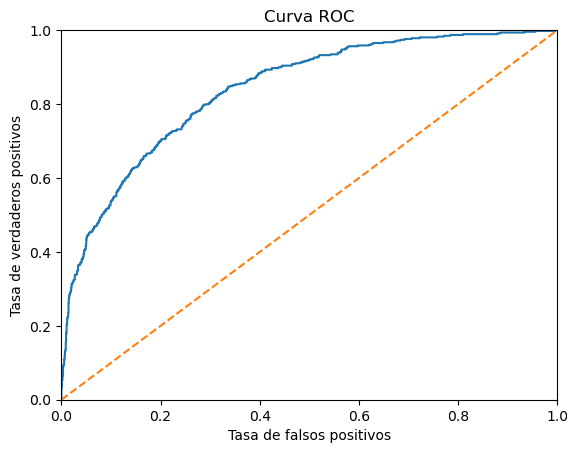

AUC-ROC: 0.8385247873735369


In [67]:
probabilities_valid = best_model.predict_proba(X_test_processed_down)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, probabilities_valid)

plt.figure()
plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('Tasa de falsos positivos')
plt.ylabel('Tasa de verdaderos positivos')
plt.title('Curva ROC')
plt.show()

auc_roc = roc_auc_score(y_test, probabilities_valid)
print(f'AUC-ROC: {auc_roc}')    

##### Logistic Regression binary classification

In [ ]:
model = LogisticRegression(random_state=12345)
model.fit(X_train_processed_down, y_train_down)

y_train_prob_ones = model.predict_proba(X_train_processed_down)[:,1]
y_test_prob_ones = model.predict_proba(X_test_processed_down)[:,1]

highest_f1_score = 0
best_threshold = 0

logistic_regression_results = pd.DataFrame(columns=['threshold', 'recall_score', 'precision_score', 'recall_score'])

n=0
for threshold in np.arange(0.3, 0.8, 0.01):
    predicted_train = y_train_prob_ones > threshold
    predicted_test = y_test_prob_ones > threshold
    current_f1 = f1_score(y_test, predicted_test)
    
    logistic_regression_results.loc[n, 'threshold'] = threshold 
    logistic_regression_results.loc[n, 'f1_score'] = current_f1
    logistic_regression_results.loc[n, 'confusion_matrix'] = str(confusion_matrix(y_test, predicted_test)).replace('\n', '*')
    logistic_regression_results.loc[n, 'training_score'] = model.score(X_train_processed_down, y_train_down)
    logistic_regression_results.loc[n, 'validation_score'] = model.score(X_test_processed_down, y_test)
    logistic_regression_results.loc[n, 'recall_score'] = recall_score(y_test, predicted_test )
    logistic_regression_results.loc[n, 'precision_score'] = precision_score(y_test, predicted_test)
    
    if current_f1 > highest_f1_score:
        highest_f1_score = current_f1
        best_threshold = threshold
    n+=1


n=0

    
logistic_regression_results


,threshold,recall_score,precision_score,recall_score,confusion_matrix,f1_score,training_score,validation_score
0,0.3,0.912664,0.252415,0.912664,[[ 577 1238]* [ 40 418]],0.395459,0.704215,0.698196
1,0.31,0.90393,0.257143,0.90393,[[ 619 1196]* [ 44 414]],0.400387,0.704215,0.698196
2,0.32,0.901747,0.263393,0.901747,[[ 660 1155]* [ 45 413]],0.407700,0.704215,0.698196
3,0.33,0.893013,0.265757,0.893013,[[ 685 1130]* [ 49 409]],0.409614,0.704215,0.698196
4,0.34,0.875546,0.267869,0.875546,[[ 719 1096]* [ 57 401]],0.410230,0.704215,0.698196
5,0.35,0.864629,0.273292,0.864629,[[ 762 1053]* [ 62 396]],0.415312,0.704215,0.698196
6,0.36,0.858079,0.280114,0.858079,[[ 805 1010]* [ 65 393]],0.422354,0.704215,0.698196
7,0.37,0.853712,0.285193,0.853712,[[835 980]* [ 67 391]],0.427556,0.704215,0.698196
8,0.38,0.840611,0.292109,0.840611,[[882 933]* [ 73 385]],0.433559,0.704215,0.698196
9,0.39,0.834061,0.298438,0.834061,[[917 898]* [ 76 382]],0.439586,0.704215,0.698196


In [69]:
logistic_regression_results.iloc[logistic_regression_results['f1_score'].idxmax()]

threshold                                 0.46
recall_score                          0.757642
precision_score                       0.351215
recall_score                          0.757642
confusion_matrix    [[1174  641]* [ 111  347]]
f1_score                              0.479945
training_score                        0.704215
validation_score                      0.698196
Name: 16, dtype: object

###### ROC curve

0.7022369386601225


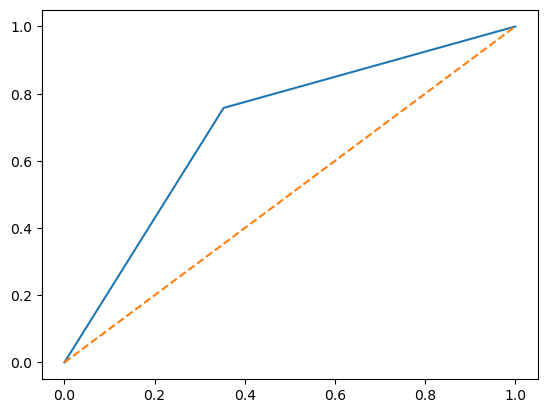

In [70]:
predicted_test = model.predict_proba(X_test_processed_down)[:, 1]> best_threshold
tpr, fpr, threshold = roc_curve(y_test, predicted_test.astype(int))


plt.figure()
plt.plot(tpr, fpr)
plt.plot([0,1], [0,1], linestyle='--')
print(roc_auc_score(y_test, predicted_test.astype(int)))

### Upsample

In [71]:
def upsample(features, target, repeat):
    features_ones = features[target==1]
    features_zeros = features[target==0]
    target_ones = target[target==1]
    target_zeros = target[target==0]
    
    features_upsampled = pd.concat([features_zeros]+[features_ones]*repeat)
    target_upsampled = pd.concat([target_zeros]+[target_ones]*repeat)
    
    return shuffle(features_upsampled, target_upsampled, random_state=12345)

In [72]:
X_train_upsa, y_train_upsa = upsample(X_train, y_train, 4)
print(y_train_upsa.value_counts())
print(X_train_upsa.shape)

Exited
1    5584
0    5422
Name: count, dtype: int64
(11006, 10)


In [73]:
encoder = OneHotEncoder(drop='first', handle_unknown='ignore', sparse_output=False)
encoder.fit(X_train_upsa[categorical_columns])
X_train_ups_enc = encoder.transform(X_train_upsa[categorical_columns])
X_test_ups_enc = encoder.transform(X_test[categorical_columns])

In [74]:
scaler = StandardScaler()
scaler.fit(X_train_upsa[numeric_columns])
X_train_ups_scaled = scaler.transform(X_train_upsa[numeric_columns])
X_test_ups_scaled = scaler.transform(X_test[numeric_columns])

In [75]:
X_train_processed_ups = np.hstack((X_train_ups_enc, X_train_ups_scaled))
X_test_processed_ups = np.hstack((X_test_ups_enc, X_test_ups_scaled))

#### Models

##### Random Forest Classifier

In [76]:
random_forest_results = pd.DataFrame(columns=['max_depth', 'confusion_matrix', 'f1_score', 'training_score', 'validation_score', 'recall_score', 'precision_score', 'roc_auc'])
n=1
for depth in range(1, 16):
    model = RandomForestClassifier(random_state=12345, max_depth=depth, n_estimators=20, class_weight='balanced')
    model.fit(X_train_processed_ups, y_train_upsa)

    predicted_test = model.predict(X_test_processed_ups)
    proba_test = model.predict_proba(X_test_processed_ups)[:, 1] #TODO: Try different thresholds for the probabilities
    
    random_forest_results.loc[n, 'max_depth'] = depth 
    random_forest_results.loc[n, 'confusion_matrix'] = str(confusion_matrix(y_test, predicted_test)).replace('\n', '*')
    random_forest_results.loc[n, 'f1_score'] = f1_score(y_test, predicted_test)
    random_forest_results.loc[n, 'training_score'] = model.score(X_train_processed_ups, y_train_upsa)
    random_forest_results.loc[n, 'validation_score'] = model.score(X_test_processed_ups, predicted_test)
    random_forest_results.loc[n, 'recall_score'] = recall_score(y_test, predicted_test)
    random_forest_results.loc[n, 'precision_score'] = precision_score(y_test, predicted_test)
    random_forest_results.loc[n, 'roc_auc'] = roc_auc_score(y_test, proba_test)
    n += 1
random_forest_results

,max_depth,confusion_matrix,f1_score,training_score,validation_score,recall_score,precision_score,roc_auc
1,1,[[1381 434]* [ 171 287]],0.486853,0.706251,1.0,0.626638,0.398058,0.771768
2,2,[[1398 417]* [ 153 305]],0.516949,0.728875,1.0,0.665939,0.422438,0.795907
3,3,[[1499 316]* [ 160 298]],0.55597,0.756224,1.0,0.650655,0.485342,0.817199
4,4,[[1474 341]* [ 156 302]],0.548592,0.754043,1.0,0.659389,0.469673,0.823028
5,5,[[1484 331]* [ 146 312]],0.566757,0.774668,1.0,0.681223,0.485226,0.836903
6,6,[[1493 322]* [ 149 309]],0.567493,0.789388,1.0,0.674672,0.489699,0.836319
7,7,[[1498 317]* [ 146 312]],0.574057,0.806015,1.0,0.681223,0.496025,0.836011
8,8,[[1498 317]* [ 144 314]],0.576676,0.827185,1.0,0.68559,0.497623,0.837918
9,9,[[1500 315]* [ 151 307]],0.568519,0.84781,1.0,0.670306,0.493569,0.840665
10,10,[[1536 279]* [ 163 295]],0.571705,0.885517,1.0,0.644105,0.513937,0.828989


In [77]:
best_model_i = int(random_forest_results['roc_auc'].idxmax())
best_model_data = random_forest_results.iloc[best_model_i-1]
best_model_data

max_depth                                    9
confusion_matrix    [[1500  315]* [ 151  307]]
f1_score                              0.568519
training_score                         0.84781
validation_score                           1.0
recall_score                          0.670306
precision_score                       0.493569
roc_auc                               0.840665
Name: 9, dtype: object

Text(0.5, 1.0, 'Upsample with Random Forest Classifier ROC plot (ROC-AUC = 0.8355756853970431 )')

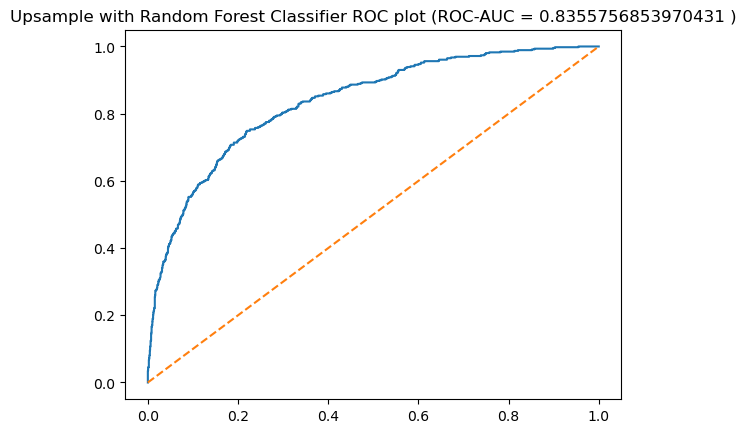

In [78]:
best_model = RandomForestClassifier(random_state=12345, n_estimators=20, max_depth=best_model_data['max_depth'])
best_model.fit(X_train_processed_ups, y_train_upsa)

probabilities = best_model.predict_proba(X_test_processed_ups)[:,1]

fpr, tpr, threshold = roc_curve(y_test, probabilities)
roc_auc = roc_auc_score(y_test, probabilities)

plt.figure()
plt.plot(fpr, tpr)
plt.plot([0,1],[0,1], linestyle='--')
plt.title(f'Upsample with Random Forest Classifier ROC plot (ROC-AUC = {roc_auc} )')

##### Logistic REgression Classifier

In [79]:
model = LogisticRegression(random_state=12345)
model.fit(X_train_processed_ups, y_train_upsa)


test_pred_proba = model.predict_proba(X_test_processed_ups)[:,1]

train_pred_proba = model.predict_proba(X_train_processed_ups)[:,1]

logistic_regression_results = pd.DataFrame(columns=['threshold', 'recall_score', 'precision_score', 'recall_score', 'auc_roc'])
n=0

for threshold in np.arange(0, 0.75, 0.01):

    test_predictions = test_pred_proba > threshold
    train_predictions = train_pred_proba > threshold

    logistic_regression_results.loc[n, 'threshold'] = threshold 
    logistic_regression_results.loc[n, 'confusion_matrix'] = str(confusion_matrix(y_test, test_predictions)).replace('\n', '*')
    logistic_regression_results.loc[n, 'f1_score'] = f1_score(y_test, test_predictions)
    logistic_regression_results.loc[n, 'training_score'] = model.score(X_train_processed_ups, y_train_upsa)
    logistic_regression_results.loc[n, 'validation_score'] = model.score(X_test_processed_ups, y_test)
    logistic_regression_results.loc[n, 'recall_score'] = recall_score(y_test, test_predictions)
    logistic_regression_results.loc[n, 'precision_score'] = precision_score(y_test, test_predictions)
    logistic_regression_results.loc[n, 'auc_roc'] = roc_auc_score(y_test, test_pred_proba)
    
    n += 1
    
logistic_regression_results


,threshold,recall_score,precision_score,recall_score,auc_roc,confusion_matrix,f1_score,training_score,validation_score
0,0.0,1.0,0.201496,1.0,0.740151,[[ 0 1815]* [ 0 458]],0.335408,0.704434,0.695996
1,0.01,1.0,0.201496,1.0,0.740151,[[ 0 1815]* [ 0 458]],0.335408,0.704434,0.695996
2,0.02,1.0,0.201496,1.0,0.740151,[[ 0 1815]* [ 0 458]],0.335408,0.704434,0.695996
3,0.03,1.0,0.201496,1.0,0.740151,[[ 0 1815]* [ 0 458]],0.335408,0.704434,0.695996
4,0.04,1.0,0.201496,1.0,0.740151,[[ 0 1815]* [ 0 458]],0.335408,0.704434,0.695996
...,...,...,...,...,...,...,...,...,...
70,0.7,0.31441,0.429851,0.31441,0.740151,[[1624 191]* [ 314 144]],0.363178,0.704434,0.695996
71,0.71,0.30131,0.445161,0.30131,0.740151,[[1643 172]* [ 320 138]],0.359375,0.704434,0.695996
72,0.72,0.28821,0.44898,0.28821,0.740151,[[1653 162]* [ 326 132]],0.351064,0.704434,0.695996
73,0.73,0.279476,0.458781,0.279476,0.740151,[[1664 151]* [ 330 128]],0.347354,0.704434,0.695996


In [80]:
best_model_data = logistic_regression_results.iloc[logistic_regression_results['f1_score'].idxmax()]

0.48
Final F1 score: 0.4842721287490856
Final AUC-ROC score: 0.7401506129175839


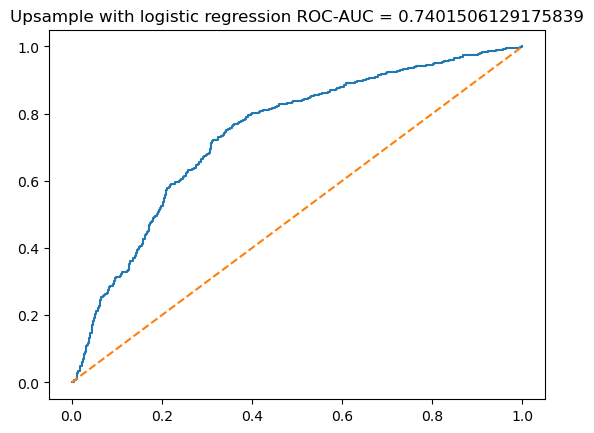

In [81]:
fpr, tpr, threshold = roc_curve(y_test, test_pred_proba)

roc_auc = roc_auc_score(y_test, test_pred_proba)


plt.figure()
plt.plot(fpr, tpr)
plt.plot([0,1], [0,1], linestyle='--')
plt.title(f'Upsample with logistic regression ROC-AUC = {roc_auc}')



# Final evaluation of the best model on the test set
# Predict on the test set and calculate evaluation metrics
final_probabilities = model.predict_proba(X_test_processed_ups)[:, 1]
final_predictions = final_probabilities > best_model_data['threshold']
print(best_model_data['threshold'])
# Calculate F1 score for the final model
final_f1 = f1_score(y_test, final_predictions)
print('Final F1 score:', final_f1)

# Calculate AUC-ROC for the final model
final_roc_auc = roc_auc_score(y_test, final_probabilities)
print('Final AUC-ROC score:', final_roc_auc)

# The results above indicate the model's ability to predict customer churn and the effectiveness of the techniques used.

## Conclusion

Random Forest Classifier are less susceptible to the effect of using imbalanced classes in our classification target. We could conclude that the internal implementations of RandomForest to handle imbalanced classes are more effective than Upsampling and downsampling